# Air b&b Project : Omar Alsaghan, Abdullah Alkhadeer, Abdullah Almubarak.

## Importing and Exploring the Data.

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
airbnb = pd.read_csv(r'C:\Users\Abdullah\Desktop\Air B&B Project\AirBnb.csv')
#Importing the Air B&B Data File.

In [3]:
airbnb.shape 
#Exploring the rows ans columns of the data.

(3723, 64)

In [4]:
airbnb.head(5)  
#Looking at a sample of the data.

,id,name,summary,space,host_id,host_url,host_name,host_since,host_location,host_about,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,7087327,Historic DC Condo-Walk to Capitol!,Professional pictures coming soon! Welcome to ...,NaN,15830506,https://www.airbnb.com/users/show/15830506,Lize & Greg,5/21/14,"Washington, District of Columbia, United States","We are two fun, friendly entrepreneurs living ...",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,975833,Spacious Capitol Hill Townhouse,NaN,Beautifully renovated Capitol Hill townhouse. ...,5338703,https://www.airbnb.com/users/show/5338703,Sebastian,3/5/13,"New York, New York, United States","Hi I'm Sebastian. \r\nAfter ten years in DC, m...",...,65,3/22/13,9/28/15,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,8249488,Spacious/private room for single,This is an ideal room for a single traveler th...,NaN,1487418,https://www.airbnb.com/users/show/1487418,Craig,12/9/11,"Washington, District of Columbia, United States",just ask,...,1,9/10/15,9/10/15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8409022,A wonderful bedroom with library,Prime location right on the Potomac River in W...,NaN,16970249,https://www.airbnb.com/users/show/16970249,Christopher,6/18/14,"Washington, District of Columbia, United States",NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8411173,Downtown Silver Spring,"Hi travellers! I live in this peaceful spot, b...",This is a 750 sq ft 1 bedroom 1 bathroom. Whi...,30369828,https://www.airbnb.com/users/show/30369828,Joshua,3/31/15,"Baltimore, Maryland, United States",NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airbnb['id'].duplicated().sum()
# Here we're checking for any duplicates in the id column to make sure no listings have been scraped twice by the bot.

0

In [6]:
airbnb.dtypes
# Identifying the types of the columns included in the data. Just to get a picture of what 
# we're dealing with.

id                               int64
name                            object
summary                         object
space                           object
host_id                          int64
host_url                        object
host_name                       object
host_since                      object
host_location                   object
host_about                      object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
host_thumbnail_url              object
host_picture_url                object
host_neighbourhood              object
host_listings_count              int64
host_total_listings_count        int64
host_has_profile_pic            object
host_identity_verified          object
street                          object
neighbourhood                   object
city                            object
state                           object
zipcode                  

## Data Cleaning 

In [7]:
airbnb.groupby('state')['id'].describe()[['count']]
# Understanding the distibution of lisitngs per State, our goal is to exclude any non DC listings. 

,count
state,
DC,3696.0
MD,24.0
NY,1.0
VA,1.0
Washington DC,1.0


In [8]:
airbnb['state'] = airbnb['state'].replace("Washington DC", "DC")
# A listing was denoted under the state Washington DC, we used this line to replace it with DC.

In [9]:
airbnb = airbnb[airbnb['state'] == 'DC']
# Since the investor is only interested in the DC area, we've only included realestate in the 
# DC area using this code.

In [10]:
airbnb.groupby('state')['id'].describe()[['count']]
# This is to ensure that only DC realestate will be included in the analysis.

,count
state,
DC,3697.0


In [11]:
airbnb.isnull().sum()[airbnb.isnull().sum() != 0]\
.sort_values(ascending=False)
# We'd like to understand the status of the null values per column. If they exist.
# Notice that neighbourhoods have null values. So we have to deal with that for future analysis.

square_feet                    3615
security_deposit               2280
monthly_price                  1900
weekly_price                   1584
cleaning_fee                   1374
host_about                      951
review_scores_checkin           862
review_scores_cleanliness       862
review_scores_accuracy          861
review_scores_location          858
review_scores_value             858
review_scores_communication     858
review_scores_rating            854
first_review                    817
last_review                     817
space                           735
host_acceptance_rate            606
host_response_time              428
host_response_rate              428
neighbourhood                   343
summary                         266
host_neighbourhood              253
bathrooms                        25
bedrooms                         21
beds                             11
zipcode                           9
host_location                     6
property_type               

In [12]:
airbnb.groupby('city')['id'].describe()[['count']]
# This was used to know which cities were included in the analysis, all are in the DC area.

,count
city,
Adams Morgan,1.0
"Capitol Hill, Washington",1.0
"Columbia Heights, middle of DC!",1.0
Dupont Circle,1.0
Washington,3628.0
Washington,2.0
"Washington, D.C.",63.0


In [13]:
airbnb = airbnb[airbnb['number_of_reviews'] != 0]
# Remove all listings without reviews.

In [14]:
airbnb = airbnb[airbnb['property_type'].notnull()]
# There was one listing with a property type null value, so we removed it.

In [15]:
airbnb.shape 
# Checking the shape of the data.

(2879, 64)

In [16]:
airbnb = airbnb.drop(['summary','space','host_url','host_location','host_thumbnail_url',\
             'host_picture_url','host_location','space','host_about','country_code','host_neighbourhood'], axis = 1)
#removing unnecessery columns. 

In [17]:
airbnb.shape
# Checking the shape of the data. After removing unnecessary columns.

(2879, 55)

In [18]:
airbnb. head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,975833,Spacious Capitol Hill Townhouse,5338703,Sebastian,3/5/13,within a day,90%,100%,f,1,...,65,3/22/13,9/28/15,94.0,10.0,9.0,10.0,10.0,9.0,9.0
23,333613,CHIC DC URBAN RETREAT,966914,Annie,8/14/11,within an hour,100%,100%,t,1,...,46,3/11/12,10/1/15,100.0,10.0,10.0,10.0,10.0,10.0,10.0
24,1026034,Perfect studio in VERY central DC,2070536,Joel,4/4/12,within a few hours,100%,100%,t,2,...,84,5/20/13,9/30/15,99.0,10.0,10.0,10.0,10.0,10.0,9.0
25,2486785,"Logan Circle Loft 1bedroom, 1.5bath",12725500,Mayrose,3/2/14,within a day,53%,69%,f,1,...,25,4/7/14,8/1/15,91.0,10.0,8.0,9.0,9.0,10.0,9.0
26,1822257,Updated 2BD Rowhome Steps to Metro,9540128,Matt,10/20/13,within an hour,100%,100%,f,1,...,4,12/16/13,8/8/14,100.0,9.0,10.0,10.0,10.0,9.0,10.0


In [19]:
airbnb.columns 
# To check what columns are left to work with.

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'city', 'state', 'zipcode', 'market', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       

### Converting price from string to float.

In [20]:
airbnb[['price']].head()
# This is used to understand what needs to be done to transform the price from string to float.
# We need to remove the dollar sign $ and the apostrophe. 

,price
1,$350.00
23,$149.00
24,$150.00
25,$175.00
26,$239.00


In [21]:
airbnb['price'] = airbnb['price'].str.strip('$')
airbnb['price'] = airbnb['price'].str.replace(',','')
airbnb['price'] = (airbnb['price']).astype(float)
# This is to remove the $ sign and apostrophe from the price string and then converting it to float.

In [22]:
airbnb['extra_people']= airbnb['extra_people'].str.strip('$')
airbnb['extra_people'] = airbnb['extra_people'].str.replace(',','')
airbnb['extra_people'] = (airbnb['extra_people']).astype(float)
# This is to remove the $ sign and apostrophe from the Extra people 
# price string and then converting it to float.

In [23]:
airbnb.dtypes[['price', 'extra_people']]
# This step is to ensure that the price and extra people column has been successfully transformed.

price           float64
extra_people    float64
dtype: object

In [24]:
airbnb.sort_values(by='price', ascending=False).head(10)['price']
# Also to check that all prices have been successfully transformed without erroneous results.

1402    1200.0
1277    1200.0
861      975.0
853      775.0
571      720.0
1254     695.0
2053     679.0
734      650.0
2889     600.0
855      595.0
Name: price, dtype: float64

### Exploring the columns and removing null neighbourhoods 

In [25]:
airbnb['property_type'].value_counts()
# This is to further comprehend property type distributions

Apartment          1752
House               963
Condominium          49
Townhouse            48
Bed & Breakfast      36
Loft                 19
Other                 8
Dorm                  2
Bungalow              1
Cabin                 1
Name: property_type, dtype: int64

In [26]:
airbnb['room_type'].value_counts()
# This is to further comprehend room type distributions

Entire home/apt    1871
Private room        931
Shared room          77
Name: room_type, dtype: int64

In [27]:
airbnb['neighbourhood'].value_counts()
# This is to further neighbourhood type distributions

Capitol Hill                          279
Columbia Heights                      209
Dupont Circle                         164
Logan Circle                          156
U Street Corridor                     146
Adams Morgan                          112
Near Northeast/H Street Corridor      106
Shaw                                   98
Petworth                               73
Georgetown                             69
Mount Pleasant                         67
Mount Vernon Square                    65
Bloomingdale                           65
Kalorama                               61
Southwest Waterfront                   55
Foggy Bottom                           49
Eckington                              48
16th Street Heights                    45
Park View                              44
Kingman Park                           43
Downtown/Penn Quarter                  40
West End                               37
Barney Circle                          34
Brookland                         

In [28]:
airbnb.isnull().sum()
# understanding the distribution of null values after cleaning.

id                                0
name                              0
host_id                           0
host_name                         0
host_since                        0
host_response_time              181
host_response_rate              181
host_acceptance_rate            266
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
street                            0
neighbourhood                   240
city                              0
state                             0
zipcode                           8
market                            0
latitude                          0
longitude                         0
is_location_exact                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        15
bedrooms                         18
beds                        

In [29]:
airbnb['neighbourhood'].isnull().sum()
# So we have 240 null values under neighbourhoods. We want to delete these values 
# to make sure we're eliminating null results.


240

In [30]:
airbnb = airbnb[airbnb['neighbourhood'].notnull()]
# Remove all null values under 

In [31]:
airbnb['neighbourhood'].isnull().sum()
# Remove null values in the neighbourhood column.

0

### Creating the revenue columns

In [32]:
airbnb['bookings'] = airbnb['number_of_reviews'] * 2
# Since we're assuming 2 stays generate 1 review. We mupltiplied  
# number of reviews by 2 to find the total bookings per listing.

In [33]:
airbnb[['number_of_reviews','bookings']].head()
# to check if the bookings column has been created successfully. 

,number_of_reviews,bookings
1,65,130
23,46,92
24,84,168
25,25,50
26,4,8


In [34]:
airbnb['accommodates'].unique()
# This is to check what unique values exist for the accommodates section. 

array([ 6,  1,  4,  3,  2,  5,  9, 10,  8,  7, 13, 15, 11, 12, 16, 14],
      dtype=int64)

In [35]:
# this function finds the revenue per listing.
# Assumptions: only 2 guests stay for the booking, unless the listing only accommodates one person, then no extra people fees apply. 
# First, if the listing only allows the accommodation of one person at a time
# i.e. accommodation = 1 then the revenue equals = number of bookings* minimum nights * price
# Second, since we're assuming that 
def get_revenue(airbnb):
    
    if airbnb['accommodates'] == 1 : return airbnb['price']
            
    elif airbnb['accommodates'] >= 2 and airbnb['guests_included'] == 1 : return airbnb['price'] + airbnb['extra_people'] 
    
    else : return airbnb['price']

In [36]:
airbnb['daily_revenue'] = airbnb.apply(get_revenue, axis =1 )
# This is to use the get_revenue function to create the daily_revenue.

In [37]:
airbnb['revenue'] = airbnb['daily_revenue'] * airbnb['bookings']*airbnb['minimum_nights']
# This is to use the revenue = daily_revenue columns * # of Bookings * Min Nights to find the total revenue.

In [38]:
airbnb[['daily_revenue','revenue','bookings','minimum_nights','price','accommodates','guests_included','extra_people']].tail()
# This is to check if the code functioned properly and the columns were created correctly.

,daily_revenue,revenue,bookings,minimum_nights,price,accommodates,guests_included,extra_people
3718,135.0,15390.0,38,3,135.0,4,2,25.0
3719,104.0,22464.0,72,3,79.0,2,1,25.0
3720,275.0,13200.0,24,2,275.0,6,1,0.0
3721,179.0,34368.0,96,2,179.0,2,0,0.0
3722,110.0,440.0,2,2,110.0,3,1,0.0


# Prompt #1: How much revenue do successful hosts make?

In [39]:
rev_per_host = airbnb.groupby(['host_id','host_name'])[['revenue']].mean().\
sort_values(by = 'revenue', ascending = True).tail(10)
rev_per_host.sort_values(by = 'revenue', ascending = False)
# We started off by assigning a new data frame using a groupby of host_id and revenue.
# To find revenue per host. 


,,revenue
host_id,host_name,
180061,Hermosa,920192.0
12830388,Jessica,393800.0
56646,Serge,196716.0
64814,Matt And Jean,164925.0
29711,The Remuzzi Brothers,157466.0
4531028,Will,154290.0
4576149,Christine + Mike,139200.0
14268157,Gohar,126157.5
253258,Daryl,119970.0


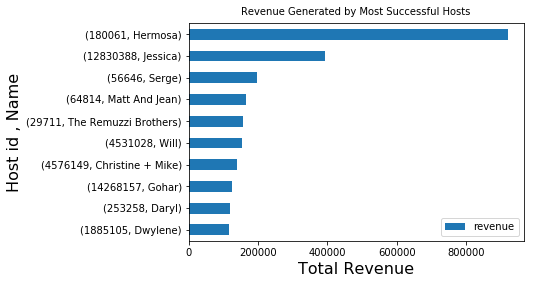

In [40]:
# Plotting most successful hosts by revenue 
#rev_per_host_plot = rev_per_host.sort_values(by = 'revenue', ascending = False)['revenue'].head(10).plot(kind = 'bar');
rev_per_host_plot = rev_per_host.plot(kind= 'barh')

#Setting a title to the plot.
rev_per_host_plot.set_title('Revenue Generated by Most Successful Hosts', fontsize=10, y=1.01);

# Move the legend.
rev_per_host_plot.legend(loc=4);

# x-axis labels
rev_per_host_plot.set_xlabel('Total Revenue', fontsize=16);

# y-axis labels
rev_per_host_plot.set_ylabel('Host id , Name', fontsize=16)
plt.xticks(rotation=0);

In [41]:
airbnb.groupby('neighbourhood')['revenue'].describe().sort_values(['mean'], ascending = False)[['mean', 'count']].head(10)
#In this line, a groupby is used to find the revenue per neighborhood, to clarify which
# neighbourhoods have been successful in attracting airb&b guests.

,mean,count
neighbourhood,,
Benning Heights,40800.000000,1.0
Langdon,38686.800000,5.0
Berkley,26866.666667,3.0
Hillcrest,23560.000000,1.0
Downtown/Penn Quarter,22390.600000,40.0
Bloomingdale,22022.676923,65.0
North Michigan Park,21407.500000,4.0
Dupont Circle,18867.682927,164.0
Capitol Hill,17798.781362,279.0


In [42]:
rev_per_neighbourhood= airbnb.groupby('neighbourhood')['revenue']\
.describe().sort_values(['mean'], ascending = False)[['mean', 'count']]
# This is used to assign the group by data frame to rev_per_neighbourhood.

In [43]:
rev_per_neighbourhood[rev_per_neighbourhood['count'] >= 40]\
. sort_values(by = ['mean'], ascending = False).head(10)
# This is used to filter out the neighborhoods that have property counts greater than 40.
# Because we want to make sure that a large specimen was used in our analysis. i.e. => 40.

,mean,count
neighbourhood,,
Downtown/Penn Quarter,22390.600000,40.0
Bloomingdale,22022.676923,65.0
Dupont Circle,18867.682927,164.0
Capitol Hill,17798.781362,279.0
Shaw,15377.000000,98.0
Mount Vernon Square,14775.200000,65.0
Eckington,13574.625000,48.0
Kingman Park,12069.162791,43.0
Mount Pleasant,11412.686567,67.0


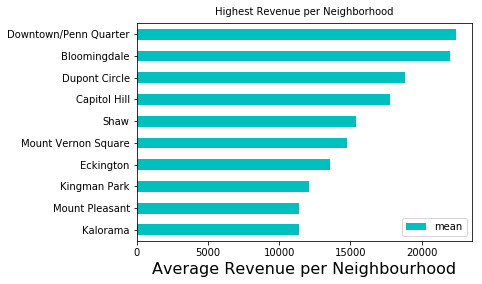

In [44]:
rev_per_neighbourhood_plot = rev_per_neighbourhood[rev_per_neighbourhood['count'] >= 40].\
sort_values(by = ['mean'])[['mean']].tail(10).plot(kind = 'barh', color = 'c');
# Plot Function

#Setting a title to the plot.
rev_per_neighbourhood_plot.set_title('Highest Revenue per Neighborhood', fontsize=10, y=1.01);

# Move the legend.
rev_per_neighbourhood_plot.legend(loc=4);

# x-axis labels
rev_per_neighbourhood_plot.set_ylabel('', fontsize=16);

# y-axis labels
rev_per_neighbourhood_plot.set_xlabel('Average Revenue per Neighbourhood', fontsize=16)
plt.xticks(rotation=0);


In [45]:
airbnb.groupby('neighbourhood')['bookings'].describe().sort_values(['mean'], ascending = False)[['mean', 'count']].head(10)
#In this line, a groupby is used to find the revenue per neighborhood, to clarify which
# neighbourhoods have been successful in attracting airb&b guests.

,mean,count
neighbourhood,,
Old Soldiers' Home,186.000000,1.0
Benning Heights,160.000000,1.0
Fort Dupont,116.000000,1.0
Langdon,113.200000,5.0
North Michigan Park,109.500000,4.0
Randle Highlands,95.428571,7.0
Cathedral Heights,83.800000,10.0
Eckington,73.083333,48.0
Lamond Riggs,72.500000,4.0


In [46]:
daily_rev_per_neighbourhood= airbnb.groupby('neighbourhood')['bookings']\
.describe().sort_values(['mean'], ascending = False)[['mean', 'count']]
# This is used to assign the group by data frame to rev_per_neighbourhood.

In [47]:
daily_rev_per_neighbourhood[daily_rev_per_neighbourhood['count'] >= 40]\
. sort_values(by = ['mean'], ascending = False).head(10)
# This is used to filter out the neighborhoods that have property counts greater than 40.
# Because we want to make sure that a large specimen is used in our analysis. i.e. => 40.

,mean,count
neighbourhood,,
Eckington,73.083333,48.0
Downtown/Penn Quarter,66.750000,40.0
Capitol Hill,59.620072,279.0
Shaw,56.510204,98.0
Petworth,49.506849,73.0
Mount Pleasant,49.402985,67.0
Kingman Park,47.302326,43.0
Dupont Circle,42.182927,164.0
Bloomingdale,41.015385,65.0


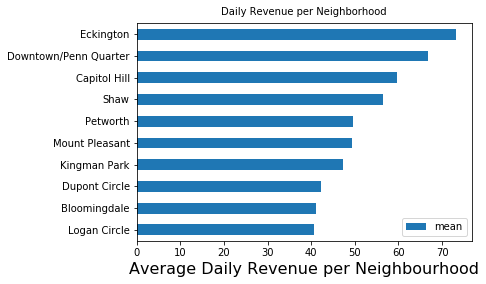

In [48]:
daily_rev_per_neighbourhood_plot = daily_rev_per_neighbourhood[daily_rev_per_neighbourhood['count'] >= 40]\
. sort_values(by = ['mean'], ascending = True).tail(10)['mean'].plot(kind = 'barh');
# This is used to filter out the neighborhoods that have property counts greater than 40.
# Because we want to make sure that a large specimen is used in our analysis. i.e. => 40.

#Setting a title to the plot.
daily_rev_per_neighbourhood_plot.set_title('Daily Revenue per Neighborhood', fontsize=10, y=1.01);

# Move the legend.
daily_rev_per_neighbourhood_plot.legend(loc=4);

# x-axis labels
daily_rev_per_neighbourhood_plot.set_ylabel('', fontsize=16);

# y-axis labels
daily_rev_per_neighbourhood_plot.set_xlabel('Average Daily Revenue per Neighbourhood', fontsize=16)
plt.xticks(rotation=0);



In [49]:
airbnb[airbnb['neighbourhood'] == 'Capitol Hill'][['revenue']].head()
# Revenue Generated by capitol hill listings only.

,revenue
1,91000.0
77,18880.0
85,87000.0
108,178.0
159,2700.0


In [50]:
airbnb[airbnb['neighbourhood'] == 'Capitol Hill'][['revenue']].describe()
# Revenue Generated by capitol hill listings statistics.

,revenue
count,279.000000
mean,17798.781362
std,25743.860880
min,100.000000
25%,1950.000000
50%,8400.000000
75%,22332.000000
max,181800.000000


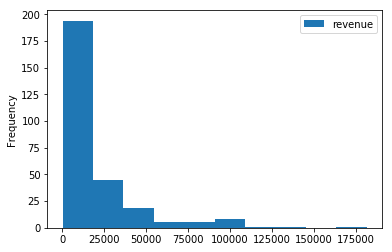

In [51]:
airbnb[airbnb['neighbourhood'] == 'Capitol Hill'][['revenue']].plot(kind = 'hist', bins = 10);
# Revenue Generated by capitol hill listings only histogram.

# Prompt #2:

In [55]:
revenue_by_property = airbnb.groupby('property_type')['revenue'].describe().sort_values(['mean'], ascending = False)[['mean', 'count']]
# What is the distribution of revenue per property type? 
# This line is used to discover this. 

In [56]:
revenue_by_property

,mean,count
property_type,,
Cabin,99880.000000,1.0
Bed & Breakfast,12595.777778,36.0
House,12490.922559,891.0
Apartment,11090.180338,1597.0
Loft,9251.375000,16.0
Other,6071.714286,7.0
Townhouse,4525.590909,44.0
Condominium,3569.822222,45.0
Bungalow,1560.000000,1.0


In [57]:
revenue_by_property[revenue_by_property['count'] >= 10][['mean']]
# We excluded any property types that have less than 10 listings.

,mean
property_type,
Bed & Breakfast,12595.777778
House,12490.922559
Apartment,11090.180338
Loft,9251.375000
Townhouse,4525.590909
Condominium,3569.822222


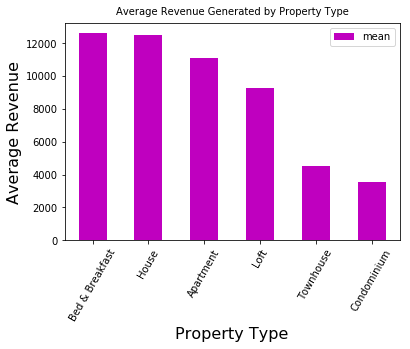

In [58]:
revenue_by_property_plot =revenue_by_property[revenue_by_property['count'] >= 10][['mean']].\
head(10).plot(kind = 'bar', color = 'm');
# Plotting revenue per property in descending order.


#Setting a title to the plot.
revenue_by_property_plot.set_title('Average Revenue Generated by Property Type', fontsize=10, y=1.01);

# Move the legend.
revenue_by_property_plot.legend(loc=1);

# x-axis labels
revenue_by_property_plot.set_ylabel('Average Revenue', fontsize=16);

# y-axis labels
revenue_by_property_plot.set_xlabel('Property Type', fontsize=16)
plt.xticks(rotation=60);


# Subprompt #3:

In [59]:
listings_per_neighbourhood = airbnb.groupby('neighbourhood')['id'].describe().sort_values(['count'], ascending = False)[['count']].head()
listings_per_neighbourhood
# This line aims to uncover the distribution of listings per neighborhood.
# Which contributes to knwoing which neighborhoods are the most popular. 

,count
neighbourhood,
Capitol Hill,279.0
Columbia Heights,209.0
Dupont Circle,164.0
Logan Circle,156.0
U Street Corridor,146.0


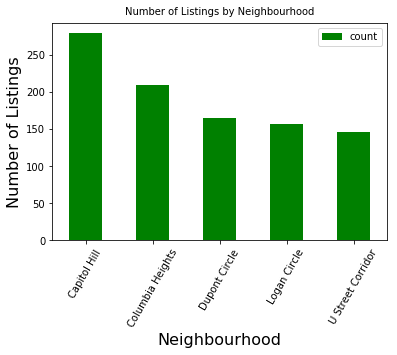

In [60]:
listings_per_neighbourhood_plot =listings_per_neighbourhood[listings_per_neighbourhood['count'] >= 40].\
sort_values(by = ['count'], ascending =False)[['count']].head(10).plot(kind = 'bar', color = 'g');
# Plot function. 

#Setting a title to the plot.
listings_per_neighbourhood_plot.set_title('Number of Listings by Neighbourhood', fontsize=10, y=1.01);

# Move the legend.
listings_per_neighbourhood_plot.legend(loc=1);

# x-axis labels
listings_per_neighbourhood_plot.set_ylabel('Number of Listings', fontsize=16);

# y-axis labels
listings_per_neighbourhood_plot.set_xlabel('Neighbourhood', fontsize=16)
plt.xticks(rotation=60);


# Subprompt 4:

In [61]:
ratings_per_neighbourhood = airbnb.groupby('neighbourhood')['review_scores_rating']\
.describe().sort_values(['mean'],ascending = False)[['mean', 'count']] 
# This groupby function aims to present which neighbourhoods gatner the highest rating.

In [62]:
ratings_per_neighbourhood[ratings_per_neighbourhood['count'] >= 40].\
sort_values(by = ['mean'], ascending =False)[['mean']].head(10)
# This function is used to filter out any neighbourhoods with listings less than 40 and sorting them
# from largest to smallest.

,mean
neighbourhood,
Near Northeast/H Street Corridor,95.666667
Capitol Hill,94.601449
Eckington,94.416667
U Street Corridor,94.372414
Mount Vernon Square,94.203125
Georgetown,94.101449
16th Street Heights,94.066667
Logan Circle,94.013072
Adams Morgan,93.936364


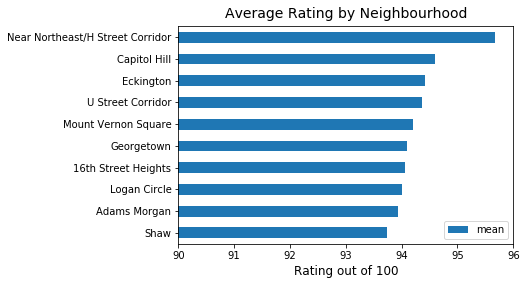

In [63]:
ratings_per_neighbourhood_plot = ratings_per_neighbourhood[ratings_per_neighbourhood['count'] >= 40]. \
sort_values(by = ['mean'], ascending =True)[['mean']].tail(10).plot( kind = 'barh',rot = 0, xlim =(90,96));
# Plot function that shows highest ratings per neighbourhood

#Setting a title to the plot.
ratings_per_neighbourhood_plot.set_title('Average Rating by Neighbourhood', fontsize=14, y=1.01);

# Move the legend.
ratings_per_neighbourhood_plot.legend(loc=4);

# x-axis labels.
ratings_per_neighbourhood_plot.set_ylabel('', fontsize=16);

# y-axis labels.
ratings_per_neighbourhood_plot.set_xlabel('Rating out of 100', fontsize=12)
plt.xticks(rotation=0);

In [64]:
airbnb[airbnb['neighbourhood'] == 'Capitol Hill'][['review_scores_rating']].describe()

,review_scores_rating
count,276.000000
mean,94.601449
std,6.059751
min,58.000000
25%,93.000000
50%,96.000000
75%,100.000000
max,100.000000


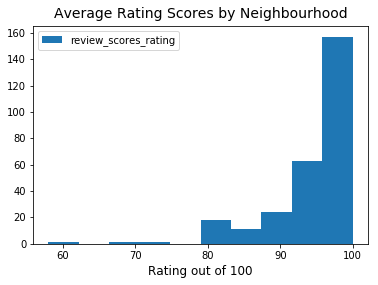

In [65]:
capitol_hill= airbnb[airbnb['neighbourhood'] == 'Capitol Hill'][['review_scores_rating']].plot(kind = 'hist', bins = 10);
# Rating Scores in capital hill only. 
#Setting a title to the plot.
capitol_hill.set_title('Average Rating Scores by Neighbourhood', fontsize=14, y=1.01);

# Move the legend.
capitol_hill.legend(loc=2);

# x-axis labels.
capitol_hill.set_ylabel('', fontsize=16);

# y-axis labels.
capitol_hill.set_xlabel('Rating out of 100', fontsize=12)
plt.xticks(rotation=0);

In [67]:
room = airbnb.groupby(['property_type','bedrooms'])[['id']].count()
room
rooms = room[:4]/room[:4].sum()*100
rooms

# Distribution of Apartment bedrooms categories in DC. 

id
property_type bedrooms           
Apartment     0.0       16.340694
              1.0       68.391167
              2.0       14.321767
              3.0        0.946372